[View in Colaboratory](https://colab.research.google.com/github/kamiloto/models/blob/master/Convolutional_network.ipynb)

In [0]:
# Install the PyDrive wrapper & import libraries.
# This only needs to be done once per notebook.
!pip install -U -q PyDrive
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

# Authenticate and create the PyDrive client.
# This only needs to be done once per notebook.
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

# Download a file based on its file ID.
#
# A file ID looks like: laggVyWshwcyP6kEI-y_W3P8D26sz
file_id = '1Ys08yalsbM29fvvPhyDxv-SV7TBg3VxK'
downloaded = drive.CreateFile({'id': file_id})
downloaded.GetContentFile(downloaded['title'])

In [3]:
!unzip cnn_data.zip > /dev/null

In [4]:
!ls data


train  validation


In [6]:
train  validation

SyntaxError: ignored

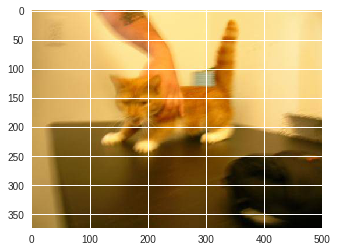

In [6]:
%matplotlib inline
import matplotlib.pyplot as plt
from keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img

img = load_img('data/train/cat/cat.0.jpg')  # this is a PIL image
x = img_to_array(img)  # this is a Numpy array with shape (3, 150, 150)
plt.imshow(img)


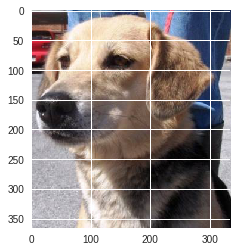

In [7]:
%matplotlib inline
import matplotlib.pyplot as plt
from keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img

img = load_img('data/train/dog/dog.125.jpg')  # this is a PIL image
x = img_to_array(img)  # this is a Numpy array with shape (3, 150, 150)
plt.imshow(img)

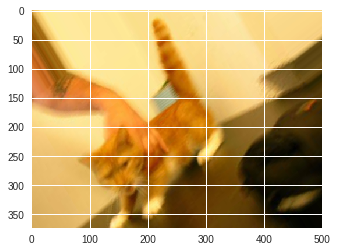

In [8]:
datagen = ImageDataGenerator(
        rotation_range=40,
        width_shift_range=0.2,
        height_shift_range=0.2,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True,
        fill_mode='nearest')

img = load_img('data/train/cat/cat.0.jpg')  # this is a PIL image
x = img_to_array(img)  # this is a Numpy array with shape (3, _, _)
x = x.reshape((1,) + x.shape)  # this is a Numpy array with shape (1, 3, _, _)

# the .flow() command below generates batches of randomly transformed images
# and saves the results to the `preview/` directory
i = 0
for batch in datagen.flow(x, batch_size=1):
    i += 1
    if i > 20:
        break  # otherwise the generator would loop indefinitely
plt.imshow(batch[0]/255) 

**modelo de red neuronal convulsional**

In [9]:
# dimensions of our images.
img_width, img_height = 150, 150

train_data_dir = 'data/train'
validation_data_dir = 'data/validation'
nb_train_samples = 2000
nb_validation_samples = 400
epochs = 50
batch_size = 16

**The convolutional network model**

In [10]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D
from keras.layers import Activation, Dropout, Flatten, Dense
from keras import backend as K


if K.image_data_format() == 'channels_first':
    input_shape = (3, img_width, img_height)
else:
    input_shape = (img_width, img_height, 3)

model = Sequential()
model.add(Conv2D(32, (3, 3), input_shape=input_shape))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(32, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(64, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())
model.add(Dense(64))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(1))
model.add(Activation('sigmoid'))

model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 148, 148, 32)      896       
_________________________________________________________________
activation_1 (Activation)    (None, 148, 148, 32)      0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 72, 72, 32)        9248      
_________________________________________________________________
activation_2 (Activation)    (None, 72, 72, 32)        0         
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 36, 36, 32)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 34, 34, 64)        18496     
__________

In [11]:
model.compile(loss='binary_crossentropy',
              optimizer='rmsprop',
              metrics=['accuracy'])

# this is the augmentation configuration we will use for training
train_datagen = ImageDataGenerator(
    rescale=1. / 255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True)

# this is the augmentation configuration we will use for testing:
# only rescaling
test_datagen = ImageDataGenerator(rescale=1. / 255)

train_generator = train_datagen.flow_from_directory(
    train_data_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='binary')

validation_generator = test_datagen.flow_from_directory(
    validation_data_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='binary')

Found 2000 images belonging to 2 classes.
Found 400 images belonging to 2 classes.


In [12]:
epochs = 10
model.fit_generator(
    train_generator,
    steps_per_epoch=nb_train_samples // batch_size,
    epochs=epochs,
    validation_data=validation_generator,
    validation_steps=nb_validation_samples // batch_size)

Epoch 1/10
125/125 [==============================] - 24s 193ms/step - loss: 0.7702 - acc: 0.5290 - val_loss: 0.6967 - val_acc: 0.5150
Epoch 2/10
125/125 [==============================] - 23s 182ms/step - loss: 0.6831 - acc: 0.5745 - val_loss: 0.6684 - val_acc: 0.5525
Epoch 3/10
125/125 [==============================] - 25s 201ms/step - loss: 0.6568 - acc: 0.6160 - val_loss: 0.6291 - val_acc: 0.6850
Epoch 4/10
 35/125 [=======>......................] - ETA: 13s - loss: 0.6533 - acc: 0.6411

125/125 [==============================] - 25s 201ms/step - loss: 0.6300 - acc: 0.6500 - val_loss: 0.5993 - val_acc: 0.7175
Epoch 5/10
125/125 [==============================] - 23s 187ms/step - loss: 0.6077 - acc: 0.6805 - val_loss: 0.5965 - val_acc: 0.6475
Epoch 6/10
125/125 [==============================] - 23s 181ms/step - loss: 0.5830 - acc: 0.7130 - val_loss: 0.5689 - val_acc: 0.6925
Epoch 7/10
 51/125 [===========>..................] - ETA: 11s - loss: 0.5904 - acc: 0.7083

125/125 [==============================] - 24s 192ms/step - loss: 0.5846 - acc: 0.7100 - val_loss: 0.6073 - val_acc: 0.6500
Epoch 8/10
125/125 [==============================] - 23s 186ms/step - loss: 0.5542 - acc: 0.7310 - val_loss: 0.5349 - val_acc: 0.7350
Epoch 9/10
125/125 [==============================] - 24s 193ms/step - loss: 0.5417 - acc: 0.7290 - val_loss: 0.5521 - val_acc: 0.7275
Epoch 10/10
 50/125 [===========>..................] - ETA: 11s - loss: 0.5012 - acc: 0.7662

125/125 [==============================] - 22s 177ms/step - loss: 0.5336 - acc: 0.7415 - val_loss: 0.5162 - val_acc: 0.7525


In [1]:
from tensorflow.python.client import device_lib
print(device_lib.list_local_devices())

[name: "/device:CPU:0"
device_type: "CPU"
memory_limit: 268435456
locality {
}
incarnation: 1307568711127359167
, name: "/device:GPU:0"
device_type: "GPU"
memory_limit: 11285974221
locality {
  bus_id: 1
  links {
  }
}
incarnation: 7353714842190281525
physical_device_desc: "device: 0, name: Tesla K80, pci bus id: 0000:00:04.0, compute capability: 3.7"
]


## Testing the classifier

[0. 1. 0. 0. 1. 1. 1. 1. 1. 0. 0. 1. 1. 1. 0. 0.]
[[0.33718026]
 [0.27197862]
 [0.2921944 ]
 [0.4619018 ]
 [0.9498329 ]
 [0.5672769 ]
 [0.8601407 ]
 [0.7063837 ]
 [0.8057183 ]
 [0.31679595]
 [0.48657575]
 [0.7936063 ]
 [0.9098004 ]
 [0.67044836]
 [0.4505013 ]
 [0.22882287]]


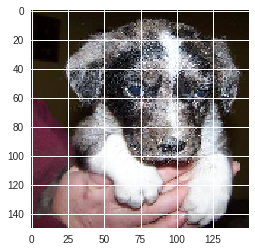

In [17]:
for x_batch, y_batch in validation_generator:
  plt.imshow((x_batch)[1])
  print(y_batch)
  print(model.predict_proba(x_batch))
  break

## Transfer Learning
We will use a pretrained image classification model from Keras. They are documented [here](https://keras.io/applications/)


In [19]:
import numpy as np
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Dropout, Flatten, Dense
from keras import applications

# dimensions of our images.
img_width, img_height = 128, 128

top_model_weights_path = 'bottleneck_fc_model.h5'
train_data_dir = 'data/train'
validation_data_dir = 'data/validation'
nb_train_samples = 2000
nb_validation_samples = 400
epochs = 50
batch_size = 16

datagen = ImageDataGenerator(rescale=1. / 255)

# build the MobileNet network
model = applications.MobileNet(include_top=False, weights='imagenet'
                               , input_shape=(img_width, img_height, 3))

generator = datagen.flow_from_directory(
    train_data_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode=None,
    shuffle=False)
bottleneck_features_train = model.predict_generator(
    generator, nb_train_samples // batch_size)
np.save('bottleneck_features_train.npy',
        bottleneck_features_train)

generator = datagen.flow_from_directory(
    validation_data_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode=None,
    shuffle=False)
bottleneck_features_validation = model.predict_generator(
    generator, nb_validation_samples // batch_size)
np.save('bottleneck_features_validation.npy',
        bottleneck_features_validation)

17227776/17225924 [==============================] - 3s 0us/step
Found 2000 images belonging to 2 classes.
Found 400 images belonging to 2 classes.


In [20]:
bottleneck_features_train.shape

(2000, 4, 4, 1024)

In [22]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 128, 128, 3)       0         
_________________________________________________________________
conv1_pad (ZeroPadding2D)    (None, 130, 130, 3)       0         
_________________________________________________________________
conv1 (Conv2D)               (None, 64, 64, 32)        864       
_________________________________________________________________
conv1_bn (BatchNormalization (None, 64, 64, 32)        128       
_________________________________________________________________
conv1_relu (Activation)      (None, 64, 64, 32)        0         
_________________________________________________________________
conv_pad_1 (ZeroPadding2D)   (None, 66, 66, 32)        0         
_________________________________________________________________
conv_dw_1 (DepthwiseConv2D)  (None, 64, 64, 32)        288       
__________

In [0]:
Cargar de nuevo los datos

In [23]:
train_data = np.load('bottleneck_features_train.npy')
train_labels = np.array(
    [0] * int(nb_train_samples / 2) + [1] * int(nb_train_samples / 2))

validation_data = np.load('bottleneck_features_validation.npy')
validation_labels = np.array(
    [0] * int(nb_validation_samples / 2) + [1] * int(nb_validation_samples / 2))

model_1 = Sequential()
model_1.add(Flatten(input_shape=train_data.shape[1:]))
model_1.add(Dense(256, activation='relu'))
model_1.add(Dropout(0.5))
model_1.add(Dense(1, activation='sigmoid'))

model_1.compile(optimizer='rmsprop',
              loss='binary_crossentropy', metrics=['accuracy'])

model_1.fit(train_data, train_labels,
          epochs=epochs,
          batch_size=batch_size,
          validation_data=(validation_data, validation_labels))
model_1.save_weights(top_model_weights_path)

Train on 2000 samples, validate on 400 samples
Epoch 1/50
2000/2000 [==============================] - 2s 1ms/step - loss: 4.3729 - acc: 0.7060 - val_loss: 0.6446 - val_acc: 0.9475
Epoch 2/50
2000/2000 [==============================] - 2s 906us/step - loss: 0.7921 - acc: 0.9345 - val_loss: 0.3192 - val_acc: 0.9700
Epoch 3/50
2000/2000 [==============================] - 2s 889us/step - loss: 0.6585 - acc: 0.9515 - val_loss: 0.3004 - val_acc: 0.9700
Epoch 4/50
2000/2000 [==============================] - 2s 915us/step - loss: 0.6352 - acc: 0.9475 - val_loss: 0.4358 - val_acc: 0.9575
Epoch 5/50
2000/2000 [==============================] - 2s 903us/step - loss: 0.4086 - acc: 0.9685 - val_loss: 0.3214 - val_acc: 0.9725
Epoch 6/50
2000/2000 [==============================] - 2s 870us/step - loss: 0.4137 - acc: 0.9650 - val_loss: 0.2655 - val_acc: 0.9750
Epoch 7/50
 400/2000 [=====>........................] - ETA: 1s - loss: 0.1876 - acc: 0.9825

2000/2000 [==============================] - 2s 877us/step - loss: 0.3247 - acc: 0.9750 - val_loss: 0.3281 - val_acc: 0.9725
Epoch 8/50
2000/2000 [==============================] - 2s 869us/step - loss: 0.3390 - acc: 0.9745 - val_loss: 0.3794 - val_acc: 0.9675
Epoch 9/50
2000/2000 [==============================] - 2s 879us/step - loss: 0.3073 - acc: 0.9730 - val_loss: 0.3389 - val_acc: 0.9700
Epoch 10/50
2000/2000 [==============================] - 2s 861us/step - loss: 0.2745 - acc: 0.9760 - val_loss: 0.2500 - val_acc: 0.9800
Epoch 11/50
2000/2000 [==============================] - 2s 847us/step - loss: 0.1556 - acc: 0.9865 - val_loss: 0.3336 - val_acc: 0.9725
Epoch 12/50
2000/2000 [==============================] - 2s 861us/step - loss: 0.1679 - acc: 0.9855 - val_loss: 0.3762 - val_acc: 0.9750
Epoch 13/50
1584/2000 [======================>.......] - ETA: 0s - loss: 0.1797 - acc: 0.9861

2000/2000 [==============================] - 2s 876us/step - loss: 0.1697 - acc: 0.9870 - val_loss: 0.8717 - val_acc: 0.9325
Epoch 14/50
2000/2000 [==============================] - 2s 975us/step - loss: 0.2152 - acc: 0.9830 - val_loss: 0.5309 - val_acc: 0.9625
Epoch 15/50
2000/2000 [==============================] - 2s 979us/step - loss: 0.1773 - acc: 0.9835 - val_loss: 0.3613 - val_acc: 0.9675
Epoch 16/50
2000/2000 [==============================] - 2s 864us/step - loss: 0.1247 - acc: 0.9900 - val_loss: 0.3282 - val_acc: 0.9750
Epoch 17/50
2000/2000 [==============================] - 2s 866us/step - loss: 0.0970 - acc: 0.9925 - val_loss: 0.4993 - val_acc: 0.9650
Epoch 18/50
2000/2000 [==============================] - 2s 865us/step - loss: 0.0870 - acc: 0.9940 - val_loss: 0.2663 - val_acc: 0.9800
Epoch 19/50
1504/2000 [=====================>........] - ETA: 0s - loss: 0.0957 - acc: 0.9900

2000/2000 [==============================] - 2s 868us/step - loss: 0.0856 - acc: 0.9900 - val_loss: 0.2854 - val_acc: 0.9775
Epoch 20/50
2000/2000 [==============================] - 2s 858us/step - loss: 0.0373 - acc: 0.9965 - val_loss: 0.2458 - val_acc: 0.9775
Epoch 21/50
2000/2000 [==============================] - 2s 866us/step - loss: 0.0658 - acc: 0.9950 - val_loss: 0.2523 - val_acc: 0.9800
Epoch 22/50
2000/2000 [==============================] - 2s 876us/step - loss: 0.0603 - acc: 0.9945 - val_loss: 0.2865 - val_acc: 0.9775
Epoch 23/50
2000/2000 [==============================] - 2s 855us/step - loss: 0.0665 - acc: 0.9940 - val_loss: 0.2718 - val_acc: 0.9825
Epoch 24/50
2000/2000 [==============================] - 2s 895us/step - loss: 0.0157 - acc: 0.9985 - val_loss: 0.3779 - val_acc: 0.9675
Epoch 25/50
1552/2000 [======================>.......] - ETA: 0s - loss: 0.0354 - acc: 0.9974

2000/2000 [==============================] - 2s 875us/step - loss: 0.0358 - acc: 0.9975 - val_loss: 0.2986 - val_acc: 0.9725
Epoch 26/50
2000/2000 [==============================] - 2s 874us/step - loss: 0.0190 - acc: 0.9985 - val_loss: 0.3091 - val_acc: 0.9700
Epoch 27/50
2000/2000 [==============================] - 2s 906us/step - loss: 0.0334 - acc: 0.9965 - val_loss: 0.3650 - val_acc: 0.9725
Epoch 28/50
2000/2000 [==============================] - 2s 914us/step - loss: 0.0216 - acc: 0.9960 - val_loss: 0.2608 - val_acc: 0.9825
Epoch 29/50
2000/2000 [==============================] - 2s 928us/step - loss: 0.0370 - acc: 0.9970 - val_loss: 0.2501 - val_acc: 0.9800
Epoch 30/50
2000/2000 [==============================] - 2s 937us/step - loss: 0.0447 - acc: 0.9965 - val_loss: 0.4399 - val_acc: 0.9600
Epoch 31/50
1296/2000 [==================>...........] - ETA: 0s - loss: 0.0220 - acc: 0.9969

2000/2000 [==============================] - 2s 941us/step - loss: 0.0222 - acc: 0.9975 - val_loss: 0.3535 - val_acc: 0.9675
Epoch 32/50
2000/2000 [==============================] - 2s 943us/step - loss: 0.0422 - acc: 0.9965 - val_loss: 0.2788 - val_acc: 0.9800
Epoch 33/50
2000/2000 [==============================] - 2s 944us/step - loss: 0.0206 - acc: 0.9980 - val_loss: 0.3683 - val_acc: 0.9675
Epoch 34/50
2000/2000 [==============================] - 2s 952us/step - loss: 0.0170 - acc: 0.9985 - val_loss: 0.4123 - val_acc: 0.9650
Epoch 35/50
2000/2000 [==============================] - 2s 939us/step - loss: 0.0293 - acc: 0.9980 - val_loss: 0.3484 - val_acc: 0.9675
Epoch 36/50
2000/2000 [==============================] - 2s 904us/step - loss: 0.0151 - acc: 0.9985 - val_loss: 0.3373 - val_acc: 0.9775
Epoch 37/50
1184/2000 [================>.............] - ETA: 0s - loss: 5.5822e-04 - acc: 1.0000

2000/2000 [==============================] - 2s 885us/step - loss: 0.0084 - acc: 0.9995 - val_loss: 0.3562 - val_acc: 0.9725
Epoch 38/50
2000/2000 [==============================] - 2s 895us/step - loss: 0.0157 - acc: 0.9985 - val_loss: 0.3386 - val_acc: 0.9700
Epoch 39/50
2000/2000 [==============================] - 2s 888us/step - loss: 0.0086 - acc: 0.9990 - val_loss: 0.4136 - val_acc: 0.9625
Epoch 40/50
2000/2000 [==============================] - 2s 892us/step - loss: 0.0080 - acc: 0.9995 - val_loss: 0.3512 - val_acc: 0.9700
Epoch 41/50
2000/2000 [==============================] - 2s 887us/step - loss: 0.0101 - acc: 0.9990 - val_loss: 0.4537 - val_acc: 0.9625
Epoch 42/50
2000/2000 [==============================] - 2s 880us/step - loss: 0.0099 - acc: 0.9990 - val_loss: 0.3068 - val_acc: 0.9750
Epoch 43/50
1440/2000 [====================>.........] - ETA: 0s - loss: 1.1335e-05 - acc: 1.0000

2000/2000 [==============================] - 2s 866us/step - loss: 0.0080 - acc: 0.9995 - val_loss: 0.3443 - val_acc: 0.9700
Epoch 44/50
2000/2000 [==============================] - 2s 865us/step - loss: 0.0209 - acc: 0.9985 - val_loss: 0.3472 - val_acc: 0.9675
Epoch 45/50
2000/2000 [==============================] - 2s 870us/step - loss: 0.0082 - acc: 0.9995 - val_loss: 0.3995 - val_acc: 0.9650
Epoch 46/50
2000/2000 [==============================] - 2s 888us/step - loss: 0.0082 - acc: 0.9995 - val_loss: 0.3325 - val_acc: 0.9750
Epoch 47/50
2000/2000 [==============================] - 2s 894us/step - loss: 0.0191 - acc: 0.9980 - val_loss: 0.3162 - val_acc: 0.9775
Epoch 48/50
2000/2000 [==============================] - 2s 887us/step - loss: 0.0080 - acc: 0.9995 - val_loss: 0.2890 - val_acc: 0.9775
Epoch 49/50
1344/2000 [===================>..........] - ETA: 0s - loss: 0.0119 - acc: 0.9993

2000/2000 [==============================] - 2s 949us/step - loss: 0.0120 - acc: 0.9990 - val_loss: 0.3309 - val_acc: 0.9775
Epoch 50/50
2000/2000 [==============================] - 2s 964us/step - loss: 0.0089 - acc: 0.9990 - val_loss: 0.3063 - val_acc: 0.9775


In [24]:
model_1.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_2 (Flatten)          (None, 16384)             0         
_________________________________________________________________
dense_3 (Dense)              (None, 256)               4194560   
_________________________________________________________________
dropout_2 (Dropout)          (None, 256)               0         
_________________________________________________________________
dense_4 (Dense)              (None, 1)                 257       
Total params: 4,194,817
Trainable params: 4,194,817
Non-trainable params: 0
_________________________________________________________________


## validación

In [38]:
test_datagen = ImageDataGenerator(rescale=1. / 255)

validation_generator = test_datagen.flow_from_directory(
    validation_data_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='binary')

for x_batch, y_batch in validation_generator:
  print(y_batch)
  print(model_1.predict_proba(model.predict(x_batch)))
  break

Found 400 images belonging to 2 classes.
[0. 1. 1. 1. 1. 0. 1. 1. 1. 1. 1. 0. 0. 1. 0. 0.]
[[0.0000000e+00]
 [1.0000000e+00]
 [1.0000000e+00]
 [1.0000000e+00]
 [1.0000000e+00]
 [0.0000000e+00]
 [1.0000000e+00]
 [1.0000000e+00]
 [1.0000000e+00]
 [1.0000000e+00]
 [1.0000000e+00]
 [0.0000000e+00]
 [1.8498035e-27]
 [1.0000000e+00]
 [0.0000000e+00]
 [0.0000000e+00]]
